In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import auc
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict,cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,precision_score,recall_score,f1_score,matthews_corrcoef,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

#Data Exploration

In [ ]:
notes=pd.read_csv("NOTEEVENTS.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
notes.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT'],
      dtype='object')

In [ ]:
notes["TEXT"].values

array(['Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n',
       'Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-

In [ ]:
notes.shape

(2083180, 11)

In [ ]:
notes.describe

<bound method NDFrame.describe of           ROW_ID  ...                                               TEXT
0            174  ...  Admission Date:  [**2151-7-16**]       Dischar...
1            175  ...  Admission Date:  [**2118-6-2**]       Discharg...
2            176  ...  Admission Date:  [**2119-5-4**]              D...
3            177  ...  Admission Date:  [**2124-7-21**]              ...
4            178  ...  Admission Date:  [**2162-3-3**]              D...
...          ...  ...                                                ...
2083175  2070657  ...  NPN\n\n\n#1  Infant remains in RA with O2 sats...
2083176  2070658  ...  Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con...
2083177  2070659  ...  Family Meeting Note\nFamily meeting held with ...
2083178  2070660  ...  NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...
2083179  2070661  ...  NPN 1800\nNursing Addendum:\n[**Known lastname...

[2083180 rows x 11 columns]>

In [ ]:
notes.sample(5)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
204768,186519,6661,184708.0,2191-02-20,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nDiffuse ST-T wave abnormalities ...
2016856,2021922,25512,102762.0,2116-09-22,2116-09-22 03:29:00,2116-09-22 03:35:00,Nursing/other,Report,14421.0,NaN,2 Resp.\n Infant remains on 02 nasal cannula ...
1749666,1749241,5141,196807.0,2195-07-25,2195-07-25 14:35:00,2195-07-25 14:42:00,Nursing/other,Report,19836.0,NaN,"NPN 07a-07p\n\n\nRESP\nCont. on NC, FiO2 100%,..."
1858751,1852588,12298,146087.0,2167-01-03,2167-01-03 19:42:00,2167-01-03 19:42:00,Nursing/other,Report,15819.0,NaN,7 Hyperbilirubinemia\n\nREVISIONS TO PATHWAY:\...
1247749,1265107,346,195392.0,2149-11-30,2149-11-30 06:01:00,2149-11-30 06:43:00,Nursing/other,Report,21297.0,NaN,Neuro: started on light sedation with Versed 0...


In [ ]:
notes.DESCRIPTION.value_counts()

Report                                   1132519
Nursing Progress Note                     191836
CHEST (PORTABLE AP)                       169270
Physician Resident Progress Note           62698
CHEST (PA & LAT)                           43158
                                          ...   
L MR UPPER XT-JT W/O CONTRAST LEFT             1
Physical Therapy Contact  Note                 1
PERC TRANHEP PORTOGRAPHY NO PRESSURES          1
Resident / Attending Note                      1
BABYGRAM CHEST DECUB ONLY (71035)              1
Name: DESCRIPTION, Length: 3848, dtype: int64

In [ ]:
notes.CATEGORY.value_counts()

Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64

In [ ]:
notes.TEXT[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [ ]:
admissions = pd.read_csv("/content/ADMISSIONS.csv")

In [ ]:
admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [ ]:
admissions.HADM_ID.describe

<bound method NDFrame.describe of 0        165315
1        152223
2        124321
3        161859
4        129635
          ...  
58971    191113
58972    101071
58973    122631
58974    170407
58975    190264
Name: HADM_ID, Length: 58976, dtype: int64>

In [ ]:
admissions = admissions.sort_values(['SUBJECT_ID','ADMITTIME'])
admissions = admissions.reset_index(drop = True)


In [ ]:
admissions.head(20)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1
5,6,7,118037,2121-05-23 15:05:00,2121-05-27 11:57:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
6,7,8,159514,2117-11-20 10:22:00,2117-11-24 14:20:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
7,8,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicaid,NaN,UNOBTAINABLE,NaN,UNKNOWN/NOT SPECIFIED,2149-11-09 11:13:00,2149-11-09 13:18:00,HEMORRHAGIC CVA,1,1
8,9,10,184167,2103-06-28 11:36:00,2103-07-06 12:10:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,SHORT TERM HOSPITAL,Medicaid,NaN,UNOBTAINABLE,NaN,BLACK/AFRICAN AMERICAN,NaN,NaN,NEWBORN,0,1
9,10,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,NaN,OTHER,MARRIED,WHITE,2178-04-15 20:46:00,2178-04-16 06:53:00,BRAIN MASS,0,1


In [ ]:
admissions.DIAGNOSIS.value_counts()

NEWBORN                                                 7823
PNEUMONIA                                               1566
SEPSIS                                                  1184
CONGESTIVE HEART FAILURE                                 928
CORONARY ARTERY DISEASE                                  840
                                                        ... 
CORONARY ARTERY DISEASE\LEFT CIRCUMFLEX INTERVENTION       1
PNEUMONIA,NEW ONSET ATRIAL FIBRILLATION                    1
LEFT FEMORAL PSEUDOANEURYSM                                1
?SEPSIS;PYELONEPHRITIS                                     1
INTRA-ABDOMINAL MASS/SDA                                   1
Name: DIAGNOSIS, Length: 15691, dtype: int64

In [ ]:
admissions.shape

(58976, 19)

In [ ]:
admissions.loc[admissions.SUBJECT_ID == 100]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
102,103,100,153952,2157-08-10 07:15:00,2157-08-18 19:54:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,WIDOWED,UNKNOWN/NOT SPECIFIED,NaN,NaN,AORTIC INSUFFICIENCY\AORTIC VALVE REPLACEMENT;...,0,1


In [ ]:
admissions.loc[admissions.SUBJECT_ID == 450]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
572,573,450,105452,2155-05-10 18:12:00,2155-05-28 16:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,HISPANIC OR LATINO,2155-05-10 15:02:00,2155-05-10 20:15:00,SEPSIS,0,1
573,574,450,182829,2155-07-24 13:28:00,2155-08-04 07:25:00,2155-08-04 07:25:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,HISPANIC OR LATINO,2155-07-24 11:46:00,2155-07-24 15:23:00,HYPOXIA,1,1


In [ ]:
admissions.loc[admissions.SUBJECT_ID == 234]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
303,304,234,188399,2105-03-02 13:50:00,2105-03-17 14:20:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,NaN,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,NON Q MU;UROSEPSIS,0,1
304,305,234,134944,2106-04-04 10:30:00,2106-04-23 15:10:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Medicare,NaN,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,CHEST PAIN/CATH,0,1


In [ ]:
admissions.dtypes

ROW_ID                   int64
SUBJECT_ID               int64
HADM_ID                  int64
ADMITTIME               object
DISCHTIME               object
DEATHTIME               object
ADMISSION_TYPE          object
ADMISSION_LOCATION      object
DISCHARGE_LOCATION      object
INSURANCE               object
LANGUAGE                object
RELIGION                object
MARITAL_STATUS          object
ETHNICITY               object
EDREGTIME               object
EDOUTTIME               object
DIAGNOSIS               object
HOSPITAL_EXPIRE_FLAG     int64
HAS_CHARTEVENTS_DATA     int64
dtype: object

In [ ]:
admissions.groupby(['ADMISSION_TYPE']).size()

ADMISSION_TYPE
ELECTIVE      7706
EMERGENCY    42071
NEWBORN       7863
URGENT        1336
dtype: int64

#Admissions Data Pre-Processing

In [ ]:
admissions.ADMITTIME = pd.to_datetime(admissions.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
admissions.DISCHTIME = pd.to_datetime(admissions.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [ ]:
admissions['ADMITTIME_succeeding'] = admissions.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
admissions.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMITTIME_succeeding
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT


In [ ]:
admissions.loc[admissions.SUBJECT_ID == 234]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding
303,304,234,188399,2105-03-02 13:50:00,2105-03-17 14:20:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,NaN,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,NON Q MU;UROSEPSIS,0,1,2106-04-04 10:30:00,EMERGENCY
304,305,234,134944,2106-04-04 10:30:00,2106-04-23 15:10:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Medicare,NaN,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,CHEST PAIN/CATH,0,1,NaT,NaN


In [ ]:
admissions.dtypes

ROW_ID                                int64
SUBJECT_ID                            int64
HADM_ID                               int64
ADMITTIME                    datetime64[ns]
DISCHTIME                    datetime64[ns]
DEATHTIME                            object
ADMISSION_TYPE                       object
ADMISSION_LOCATION                   object
DISCHARGE_LOCATION                   object
INSURANCE                            object
LANGUAGE                             object
RELIGION                             object
MARITAL_STATUS                       object
ETHNICITY                            object
EDREGTIME                            object
EDOUTTIME                            object
DIAGNOSIS                            object
HOSPITAL_EXPIRE_FLAG                  int64
HAS_CHARTEVENTS_DATA                  int64
ADMITTIME_succeeding         datetime64[ns]
ADMISSION_TYPE_succeeding            object
dtype: object

In [ ]:
admissions.shape

(58976, 21)

In [ ]:
admissions.describe

<bound method NDFrame.describe of        ROW_ID  SUBJECT_ID  ...  ADMITTIME_succeeding ADMISSION_TYPE_succeeding
0           1           2  ...                   NaT                       NaN
1           2           3  ...                   NaT                       NaN
2           3           4  ...                   NaT                       NaN
3           4           5  ...                   NaT                       NaN
4           5           6  ...                   NaT                       NaN
...       ...         ...  ...                   ...                       ...
58971   58972       99985  ...                   NaT                       NaN
58972   58973       99991  ...                   NaT                       NaN
58973   58974       99992  ...                   NaT                       NaN
58974   58975       99995  ...                   NaT                       NaN
58975   58976       99999  ...                   NaT                       NaN

[58976 rows x 21 

In [ ]:
admissions.isnull().sum()

ROW_ID                           0
SUBJECT_ID                       0
HADM_ID                          0
ADMITTIME                        0
DISCHTIME                        0
DEATHTIME                    53122
ADMISSION_TYPE                   0
ADMISSION_LOCATION               0
DISCHARGE_LOCATION               0
INSURANCE                        0
LANGUAGE                     25332
RELIGION                       458
MARITAL_STATUS               10128
ETHNICITY                        0
EDREGTIME                    28099
EDOUTTIME                    28099
DIAGNOSIS                       25
HOSPITAL_EXPIRE_FLAG             0
HAS_CHARTEVENTS_DATA             0
ADMITTIME_succeeding         46520
ADMISSION_TYPE_succeeding    46520
dtype: int64

In [ ]:
admissions.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT,NaN
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT,NaN
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT,NaN


In [ ]:
admissions['As_D_time'] = (admissions.ADMITTIME_succeeding - admissions.DISCHTIME).dt.total_seconds()/(24*60*60)


In [ ]:
admissions.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT,NaN,NaN
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT,NaN,NaN
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT,NaN,NaN


In [ ]:
admissions.loc[admissions.SUBJECT_ID == 234]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time
303,304,234,188399,2105-03-02 13:50:00,2105-03-17 14:20:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,NaN,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,NON Q MU;UROSEPSIS,0,1,2106-04-04 10:30:00,EMERGENCY,382.840278
304,305,234,134944,2106-04-04 10:30:00,2106-04-23 15:10:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Medicare,NaN,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,CHEST PAIN/CATH,0,1,NaT,NaN,NaN


In [ ]:
admissions.loc[admissions.SUBJECT_ID == 124]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time
165,166,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Private,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CVA,0,1,2161-12-17 03:39:00,EMERGENCY,519.520139
166,167,124,112906,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1,2165-05-21 21:02:00,ELECTIVE,1244.227083
167,168,124,134369,2165-05-21 21:02:00,2165-06-06 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,CLAUDICATION,0,1,2165-12-31 18:55:00,EMERGENCY,208.121528
168,169,124,138376,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,NaT,NaN,NaN


#Textual Data Pre-Processing

In [ ]:
notes.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [ ]:
notes.shape

(2083180, 11)

In [ ]:
notes.groupby(['CATEGORY']).size()

CATEGORY
Case Management         967
Consult                  98
Discharge summary     59652
ECG                  209051
Echo                  45794
General                8301
Nursing              223556
Nursing/other        822497
Nutrition              9418
Pharmacy                103
Physician            141624
Radiology            522279
Rehab Services         5431
Respiratory           31739
Social Work            2670
dtype: int64

In [ ]:
disch_summary = notes.loc[notes.CATEGORY == 'Discharge summary']

In [ ]:
disch_summary

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
60411,59608,93924,135672.0,2104-06-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18321**],[**Known fir..."
60412,59609,17782,155710.0,2112-03-31,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 2706**], [**Known fir..."
60413,59621,96333,183951.0,2197-06-18,NaN,NaN,Discharge summary,Addendum,NaN,NaN,Name: [**Known lastname 18357**]-[**Known las...
60414,59622,66717,169165.0,2129-08-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname **],[**Known firstnam..."


In [ ]:
notes.TEXT[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [ ]:
notes.loc[notes.SUBJECT_ID == 124]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
2536,2574,124,172461.0,2160-07-15,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2160-6-24**] Dischar...
2537,2575,124,112906.0,2161-12-24,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2161-12-17**] Discha...
2538,2576,124,134369.0,2165-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2165-5-21**] ...
2539,2577,124,138376.0,2166-02-01,NaN,NaN,Discharge summary,Report,NaN,NaN,Unit No: [**Numeric Identifier 13036**]\nAdmi...
55628,55389,124,134369.0,2165-06-06,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 1929**],[**Known firs..."
...,...,...,...,...,...,...,...,...,...,...,...
1260448,1261804,124,112906.0,2161-12-20,2161-12-20 16:49:00,2161-12-20 17:08:00,Nursing/other,Report,19589.0,NaN,NPN MICU-B 7AM-7PM\nS/O: C/V: Remains off of E...
1260449,1261805,124,112906.0,2161-12-21,2161-12-21 04:31:00,2161-12-21 04:55:00,Nursing/other,Report,16818.0,NaN,"micu 1900-0700 RN notes\n\nneuro: A/Ox3, MAE,P..."
1261757,1261791,124,172461.0,2160-07-10,2160-07-10 18:49:00,2160-07-10 19:14:00,Nursing/other,Report,18679.0,NaN,NPN-MICU\nMr. [**Known lastname 627**] [**Last...
1261758,1261792,124,172461.0,2160-07-11,2160-07-11 05:38:00,2160-07-11 05:45:00,Nursing/other,Report,21452.0,NaN,NURSING PROGRESS NOTE:\nPT ALERT AND ORIENTED ...


In [ ]:
notes.loc[notes.SUBJECT_ID == 450]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
46194,48194,450,105452.0,2155-05-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2155-5-10**] ...
46195,48195,450,182829.0,2155-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2155-7-24**] ...
99574,98909,450,105452.0,2155-05-19,NaN,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: Endocar...
269792,278881,450,182829.0,2155-07-25,NaN,NaN,ECG,Report,NaN,NaN,Multifocal atrial tachycardia\nPrior inferior ...
269793,278882,450,182829.0,2155-07-24,NaN,NaN,ECG,Report,NaN,NaN,Probable sinus tachycardia\nLeft axis deviatio...
269794,278883,450,105452.0,2155-05-28,NaN,NaN,ECG,Report,NaN,NaN,Sinus tachycardia with atrial premature comple...
269795,278884,450,105452.0,2155-05-27,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nAtrial premature complex\nRight ...
269796,278885,450,105452.0,2155-05-18,NaN,NaN,ECG,Report,NaN,NaN,Baseline artifact\nRegular tachycardia - basel...
269797,278886,450,105452.0,2155-05-10,NaN,NaN,ECG,Report,NaN,NaN,"Sinus tachycardia, rate 119. Since the previou..."
1244887,1267103,450,182829.0,2155-07-29,2155-07-29 00:31:00,2155-07-29 01:01:00,Nursing/other,Report,18469.0,NaN,NPN 1900-0700:\nNeuro: Pt is sedated with Fent...


In [ ]:
last_disch_summary = (disch_summary.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()

In [ ]:
last_disch_summary.shape

(52726, 11)

In [ ]:
last_disch_summary.loc[last_disch_summary.SUBJECT_ID == 450]

,SUBJECT_ID,HADM_ID,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
505,450,105452.0,48194,2155-05-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2155-5-10**] ...
506,450,182829.0,48195,2155-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2155-7-24**] ...


In [ ]:
last_disch_summary.sample(10)

,SUBJECT_ID,HADM_ID,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
22625,21655,191489.0,10696,2176-04-20,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2176-4-7**] D...
47583,83100,135812.0,55724,2139-02-10,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname **],[**Known firstnam..."
43415,69513,139550.0,39409,2135-11-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2135-10-30**] ...
47151,81728,179517.0,37709,2138-11-06,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2138-10-5**] ...
46731,80504,110562.0,39903,2192-02-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2192-2-1**] D...
16301,15630,181017.0,23305,2177-01-17,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2177-1-14**] Dischar...
23657,22695,175477.0,13010,2122-01-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2121-12-30**] Discha...
33056,31645,170059.0,48027,2141-08-19,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2141-8-15**] ...
49783,90508,142580.0,28605,2195-10-02,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2195-9-26**] ...
34655,41457,142779.0,38266,2197-07-31,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2197-7-14**] ...


In [ ]:
merged = pd.merge(admissions[['SUBJECT_ID','HADM_ID','ADMISSION_TYPE','ADMITTIME','DISCHTIME','DEATHTIME','ADMITTIME_succeeding','ADMISSION_TYPE_succeeding','As_D_time']],last_disch_summary[['SUBJECT_ID','HADM_ID','TEXT']], on = ['SUBJECT_ID','HADM_ID'], how = 'left')

In [ ]:
merged.sample(10)

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT
1673,1355,127417,EMERGENCY,2124-08-23 23:03:00,2124-09-30 11:21:00,NaN,NaT,NaN,NaN,Admission Date: [**2124-8-23**] Dischar...
4290,3562,164663,NEWBORN,2198-07-18 01:44:00,2198-07-24 11:10:00,NaN,NaT,NaN,NaN,Admission Date: [**2198-7-18**] Dischar...
44295,54096,113151,EMERGENCY,2156-09-29 01:01:00,2156-10-03 17:15:00,NaN,NaT,NaN,NaN,Admission Date: [**2156-9-29**] ...
20546,16807,199707,EMERGENCY,2114-01-04 23:10:00,2114-01-05 15:20:00,NaN,NaT,NaN,NaN,NaN
42153,47529,175931,EMERGENCY,2145-08-01 17:36:00,2145-08-16 19:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2145-8-1**] D...
25910,21227,187169,EMERGENCY,2188-05-08 11:39:00,2188-05-16 14:39:00,NaN,NaT,NaN,NaN,Admission Date: [**2188-5-8**] Discharge ...
41824,46471,180023,EMERGENCY,2140-06-11 19:26:00,2140-06-17 13:58:00,NaN,NaT,NaN,NaN,Admission Date: [**2140-6-11**] ...
12696,10386,121660,EMERGENCY,2166-06-10 16:48:00,2166-06-11 19:30:00,NaN,NaT,NaN,NaN,NaN
53650,83167,169287,EMERGENCY,2114-03-14 16:22:00,2114-03-21 13:10:00,NaN,NaT,NaN,NaN,Admission Date: [**2114-3-14**] ...
929,755,123796,URGENT,2197-07-07 18:33:00,2197-09-01 11:58:00,NaN,2199-01-01 07:15:00,ELECTIVE,486.803472,"Name: [**Known lastname 17456**],VINCENCA ..."


In [ ]:
merged.groupby('ADMISSION_TYPE').apply(lambda g: g.TEXT.isnull().sum())/merged.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.048663
EMERGENCY    0.037983
NEWBORN      0.536691
URGENT       0.042665
dtype: float64

In [ ]:
merged.shape

(58976, 10)

In [ ]:
merged.loc[merged.SUBJECT_ID == 124]

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT
165,124,172461,EMERGENCY,2160-06-24 21:25:00,2160-07-15 15:10:00,NaN,2161-12-17 03:39:00,EMERGENCY,519.520139,Admission Date: [**2160-6-24**] Dischar...
166,124,112906,EMERGENCY,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,2165-05-21 21:02:00,ELECTIVE,1244.227083,Admission Date: [**2161-12-17**] Discha...
167,124,134369,ELECTIVE,2165-05-21 21:02:00,2165-06-06 16:00:00,NaN,2165-12-31 18:55:00,EMERGENCY,208.121528,"Name: [**Known lastname 1929**],[**Known firs..."
168,124,138376,EMERGENCY,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00,NaT,NaN,NaN,Unit No: [**Numeric Identifier 13036**]\nAdmi...


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58976 entries, 0 to 58975
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SUBJECT_ID                 58976 non-null  int64         
 1   HADM_ID                    58976 non-null  int64         
 2   ADMISSION_TYPE             58976 non-null  object        
 3   ADMITTIME                  58976 non-null  datetime64[ns]
 4   DISCHTIME                  58976 non-null  datetime64[ns]
 5   DEATHTIME                  5854 non-null   object        
 6   ADMITTIME_succeeding       12456 non-null  datetime64[ns]
 7   ADMISSION_TYPE_succeeding  12456 non-null  object        
 8   As_D_time                  12456 non-null  float64       
 9   TEXT                       52726 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 4.9+ MB


In [ ]:
print('Fraction of missing notes:', merged.TEXT.isnull().sum() / len(merged))
print('Fraction notes with newlines:', merged.TEXT.str.contains('\n').sum() / len(merged))
print('Fraction notes with carriage returns:', merged.TEXT.str.contains('\r').sum() / len(merged))

Fraction of missing notes: 0.1059753119913185
Fraction notes with newlines: 0.8940246880086815
Fraction notes with carriage returns: 0.0


In [ ]:
merged_clean = merged.loc[merged.ADMISSION_TYPE != 'NEWBORN'].copy()
merged_clean

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT
1,3,145834,EMERGENCY,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,NaT,NaN,NaN,Admission Date: [**2101-10-20**] Discharg...
2,4,185777,EMERGENCY,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,NaT,NaN,NaN,Admission Date: [**2191-3-16**] Discharge...
4,6,107064,ELECTIVE,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2175-5-30**] Dischar...
7,9,150750,EMERGENCY,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,NaT,NaN,NaN,"Name: [**Known lastname 10050**], [**Known fi..."
9,11,194540,EMERGENCY,2178-04-16 06:18:00,2178-05-11 19:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2178-4-16**] ...
...,...,...,...,...,...,...,...,...,...,...
58971,99985,176670,EMERGENCY,2181-01-27 02:47:00,2181-02-12 17:05:00,NaN,NaT,NaN,NaN,Admission Date: [**2181-1-27**] ...
58972,99991,151118,ELECTIVE,2184-12-24 08:30:00,2185-01-05 12:15:00,NaN,NaT,NaN,NaN,Admission Date: [**2184-12-24**] ...
58973,99992,197084,EMERGENCY,2144-07-25 18:03:00,2144-07-28 17:56:00,NaN,NaT,NaN,NaN,Admission Date: [**2144-7-25**] ...
58974,99995,137810,ELECTIVE,2147-02-08 08:00:00,2147-02-11 13:15:00,NaN,NaT,NaN,NaN,Admission Date: [**2147-2-8**] D...


In [ ]:
print('Fraction of missing notes:', merged_clean.TEXT.isnull().sum() / len(merged_clean))
print('Fraction notes with newlines:', merged_clean.TEXT.str.contains('\n').sum() / len(merged_clean))
print('Fraction notes with carriage returns:', merged_clean.TEXT.str.contains('\r').sum() / len(merged_clean))

Fraction of missing notes: 0.03971592354195606
Fraction notes with newlines: 0.9602840764580439
Fraction notes with carriage returns: 0.0


In [ ]:
merged_clean['OUTPUT_LABEL'] = (merged_clean.As_D_time < 30).astype('int')

In [ ]:
print('Number of positive samples:', (merged_clean.OUTPUT_LABEL == 1).sum())
print('Number of negative samples:',  (merged_clean.OUTPUT_LABEL == 0).sum())
print('Total samples:', len(merged_clean))

Number of positive samples: 3166
Number of negative samples: 47947
Total samples: 51113


In [ ]:
merged_clean = merged_clean.sample(n = len(merged_clean), random_state = 42)
merged_clean = merged_clean.reset_index(drop = True)

In [ ]:
valid_test = merged_clean.sample(frac=0.20,random_state=42) 

In [ ]:
testing = valid_test.sample(frac = 0.2, random_state = 42) ##0.5
validation = valid_test.drop(testing.index)

In [ ]:
training = merged_clean.drop(valid_test.index)

In [ ]:
training

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
0,21284,126923,ELECTIVE,2168-05-03 07:15:00,2168-05-10 14:50:00,NaN,2171-02-04 04:04:00,EMERGENCY,999.551389,Admission Date: [**2168-5-3**] Discharg...,0
1,9344,116730,EMERGENCY,2199-05-21 02:59:00,2199-06-26 14:32:00,NaN,NaT,NaN,NaN,Admission Date: [**2199-5-21**] ...,0
2,4308,109424,EMERGENCY,2141-04-04 18:38:00,2141-04-06 16:52:00,NaN,NaT,NaN,NaN,Admission Date: [**2141-4-4**] D...,0
3,82935,157739,EMERGENCY,2183-01-17 20:44:00,2183-01-19 11:19:00,NaN,NaT,NaN,NaN,Admission Date: [**2183-1-17**] ...,0
5,3365,100103,ELECTIVE,2179-12-13 07:15:00,2179-12-23 13:15:00,NaN,NaT,NaN,NaN,Admission Date: [**2179-12-13**] Discha...,0
...,...,...,...,...,...,...,...,...,...,...,...
51108,11618,197247,EMERGENCY,2161-04-23 15:24:00,2161-05-01 17:45:00,NaN,2162-06-02 11:30:00,ELECTIVE,396.739583,Admission Date: [**2161-4-23**] ...,0
51109,80020,102127,EMERGENCY,2132-11-18 14:06:00,2132-11-28 13:58:00,NaN,NaT,NaN,NaN,Admission Date: [**2132-11-17**] ...,0
51110,59281,141901,EMERGENCY,2147-03-03 19:39:00,2147-03-13 17:20:00,NaN,NaT,NaN,NaN,Admission Date: [**2147-3-3**] D...,0
51111,841,140374,ELECTIVE,2153-12-02 15:24:00,2153-12-07 17:05:00,NaN,NaT,NaN,NaN,Admission Date: [**2153-12-2**] ...,0


In [ ]:
testing

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
18471,26318,137872,EMERGENCY,2134-11-19 21:10:00,2134-12-01 14:41:00,2134-12-01 14:41:00,NaT,NaN,NaN,Admission Date: [**2134-11-19**] Discha...,0
37885,11870,122366,EMERGENCY,2204-12-13 06:01:00,2204-12-17 13:52:00,NaN,NaT,NaN,NaN,Admission Date: [**2204-12-13**] ...,0
17638,57288,133596,EMERGENCY,2167-09-10 19:09:00,2167-09-15 18:19:00,NaN,NaT,NaN,NaN,Admission Date: [**2167-9-10**] ...,0
4459,28416,103034,EMERGENCY,2168-04-02 05:56:00,2168-04-06 20:09:00,NaN,NaT,NaN,NaN,Admission Date: [**2168-4-2**] D...,0
18498,30030,180857,EMERGENCY,2147-12-08 22:03:00,2147-12-18 16:30:00,NaN,NaT,NaN,NaN,Admission Date: [**2147-12-8**] Dischar...,0
...,...,...,...,...,...,...,...,...,...,...,...
1444,85457,125594,EMERGENCY,2196-11-11 22:10:00,2196-12-02 17:43:00,NaN,2197-07-27 17:24:00,EMERGENCY,236.986806,Admission Date: [**2196-11-11**] ...,0
9194,85870,160998,EMERGENCY,2146-02-16 11:57:00,2146-03-16 14:15:00,NaN,NaT,NaN,NaN,Admission Date: [**2146-2-16**] ...,0
30474,19039,111084,ELECTIVE,2109-03-06 16:15:00,2109-03-20 13:30:00,NaN,NaT,NaN,NaN,Admission Date: [**2109-3-6**] Discharg...,0
3863,83100,135812,EMERGENCY,2139-01-12 23:03:00,2139-02-10 17:30:00,NaN,NaT,NaN,NaN,"Name: [**Known lastname **],[**Known firstnam...",0


In [ ]:
validation

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
9061,88526,108529,EMERGENCY,2188-07-25 01:46:00,2188-07-31 14:45:00,NaN,NaT,NaN,NaN,"Name: [**Known lastname **],[**Known firstnam...",0
4144,3708,133058,ELECTIVE,2181-11-21 11:15:00,2181-11-26 14:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2181-11-21**] Discha...,0
26434,16644,183141,ELECTIVE,2183-11-24 07:15:00,2183-12-01 13:20:00,NaN,NaT,NaN,NaN,Admission Date: [**2183-11-24**] ...,0
3222,3320,185608,EMERGENCY,2170-01-13 23:07:00,2170-01-14 12:00:00,2170-01-14 12:00:00,NaT,NaN,NaN,Admission Date: [**2170-1-13**] ...,0
2982,4074,137421,EMERGENCY,2204-02-04 07:26:00,2204-02-06 01:40:00,2204-02-06 01:40:00,NaT,NaN,NaN,Admission Date: [**2204-2-4**] D...,0
...,...,...,...,...,...,...,...,...,...,...,...
1127,83326,148589,EMERGENCY,2171-01-04 17:44:00,2171-01-07 13:05:00,NaN,NaT,NaN,NaN,Admission Date: [**2171-1-4**] D...,0
45999,79557,174882,EMERGENCY,2173-12-08 18:14:00,2173-12-11 13:57:00,NaN,NaT,NaN,NaN,Admission Date: [**2173-12-8**] ...,0
28993,9481,180858,EMERGENCY,2157-03-17 11:21:00,2157-03-27 15:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2157-3-17**] ...,0
9555,3203,138236,EMERGENCY,2131-11-21 18:13:00,2131-11-29 14:10:00,NaN,NaT,NaN,NaN,Admission Date: [**2131-11-21**] ...,0


In [ ]:
print('Test prevalence(n = %d):'%len(testing),testing.OUTPUT_LABEL.sum()/ len(testing))
print('Valid prevalence(n = %d):'%len(validation),validation.OUTPUT_LABEL.sum()/ len(validation))
print('Train all prevalence(n = %d):'%len(training), training.OUTPUT_LABEL.sum()/ len(training))
print('all samples (n = %d)'%len(merged_clean))

Test prevalence(n = 2045): 0.06894865525672372
Valid prevalence(n = 8178): 0.061995597945708
Train all prevalence(n = 40890): 0.0615798483736855
all samples (n = 51113)


In [ ]:
row_p = training.OUTPUT_LABEL == 1
train_p = training.loc[row_p]
train_n = training.loc[~row_p]
df_train = pd.concat([train_p, train_n.sample(n = len(train_p), random_state = 42)],axis = 0)
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)
print('Train prevalence (n = %d):'%len(df_train), df_train.OUTPUT_LABEL.sum()/ len(df_train))

Train prevalence (n = 5036): 0.5


In [ ]:
row_p = training.OUTPUT_LABEL == 1
train_p = training.loc[row_p]
train_n = training.loc[~row_p]


In [ ]:
df_train = pd.concat([train_p, train_n.sample(n = len(train_p), random_state = 42)],axis = 0) #merging the data

In [ ]:
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True) #shuffle

In [ ]:
print('Train prevalence (n = %d):'%len(df_train), df_train.OUTPUT_LABEL.sum()/ len(df_train))

Train prevalence (n = 5036): 0.5


__________________________________________________________________________

#DATA VISUALIZATION 

[Text(0.5, 0, 'Days Between Readmission')]

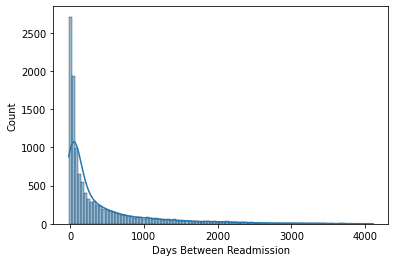

In [ ]:
ax=sns.histplot(data=merged, x='As_D_time', kde = True)
ax.set(xlabel='Days Between Readmission')


In [ ]:
merged.HADM_ID.value_counts()

141307    1
156377    1
123625    1
103143    1
105190    1
         ..
171641    1
190070    1
196213    1
194164    1
131072    1
Name: HADM_ID, Length: 52726, dtype: int64

In [ ]:
admissions.HADM_ID.value_counts()

135166    1
156441    1
138006    1
131861    1
133908    1
         ..
171705    1
190134    1
196277    1
194228    1
131072    1
Name: HADM_ID, Length: 58976, dtype: int64

In [ ]:
merged.head(10)


,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
1,3,145834,EMERGENCY,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,NaN,NaN,Admission Date: [**2101-10-20**] Discharg...,0
2,4,185777,EMERGENCY,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,NaN,NaN,Admission Date: [**2191-3-16**] Discharge...,0
4,6,107064,ELECTIVE,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,NaN,NaN,Admission Date: [**2175-5-30**] Dischar...,0
7,9,150750,EMERGENCY,2149-11-09 13:06:00,2149-11-14 10:15:00,NaT,NaN,NaN,"Name: [**Known lastname 10050**], [**Known fi...",0
8,10,184167,NEWBORN,2103-06-28 11:36:00,2103-07-06 12:10:00,NaT,NaN,NaN,Admission Date: [**2103-6-28**] Dischar...,0
9,11,194540,EMERGENCY,2178-04-16 06:18:00,2178-05-11 19:00:00,NaT,NaN,NaN,Admission Date: [**2178-4-16**] ...,0
10,12,112213,ELECTIVE,2104-08-07 10:15:00,2104-08-20 02:57:00,NaT,NaN,NaN,Admission Date: [**2104-8-7**] Discharge ...,0
11,13,143045,EMERGENCY,2167-01-08 18:43:00,2167-01-15 15:15:00,NaT,NaN,NaN,"Name: [**Known lastname 9900**], [**Known fir...",0
13,17,194023,ELECTIVE,2134-12-27 07:15:00,2134-12-31 16:05:00,2135-05-09 14:11:00,EMERGENCY,128.920833,Admission Date: [**2134-12-27**] ...,0
14,17,161087,EMERGENCY,2135-05-09 14:11:00,2135-05-13 14:40:00,NaT,NaN,NaN,Admission Date: [**2135-5-9**] D...,0


In [ ]:
merged['OUTPUT_LABEL'] = (merged.As_D_time< 30).astype('int')
merged.head()

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
1,3,145834,EMERGENCY,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,NaN,NaN,Admission Date: [**2101-10-20**] Discharg...,0
2,4,185777,EMERGENCY,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,NaN,NaN,Admission Date: [**2191-3-16**] Discharge...,0
4,6,107064,ELECTIVE,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,NaN,NaN,Admission Date: [**2175-5-30**] Dischar...,0
7,9,150750,EMERGENCY,2149-11-09 13:06:00,2149-11-14 10:15:00,NaT,NaN,NaN,"Name: [**Known lastname 10050**], [**Known fi...",0
8,10,184167,NEWBORN,2103-06-28 11:36:00,2103-07-06 12:10:00,NaT,NaN,NaN,Admission Date: [**2103-6-28**] Dischar...,0


In [ ]:
merged=merged[merged['TEXT'].notna()]
merged.head(50)

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
1,3,145834,EMERGENCY,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,NaN,NaN,Admission Date: [**2101-10-20**] Discharg...,0
2,4,185777,EMERGENCY,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,NaN,NaN,Admission Date: [**2191-3-16**] Discharge...,0
4,6,107064,ELECTIVE,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,NaN,NaN,Admission Date: [**2175-5-30**] Dischar...,0
7,9,150750,EMERGENCY,2149-11-09 13:06:00,2149-11-14 10:15:00,NaT,NaN,NaN,"Name: [**Known lastname 10050**], [**Known fi...",0
8,10,184167,NEWBORN,2103-06-28 11:36:00,2103-07-06 12:10:00,NaT,NaN,NaN,Admission Date: [**2103-6-28**] Dischar...,0
9,11,194540,EMERGENCY,2178-04-16 06:18:00,2178-05-11 19:00:00,NaT,NaN,NaN,Admission Date: [**2178-4-16**] ...,0
10,12,112213,ELECTIVE,2104-08-07 10:15:00,2104-08-20 02:57:00,NaT,NaN,NaN,Admission Date: [**2104-8-7**] Discharge ...,0
11,13,143045,EMERGENCY,2167-01-08 18:43:00,2167-01-15 15:15:00,NaT,NaN,NaN,"Name: [**Known lastname 9900**], [**Known fir...",0
13,17,194023,ELECTIVE,2134-12-27 07:15:00,2134-12-31 16:05:00,2135-05-09 14:11:00,EMERGENCY,128.920833,Admission Date: [**2134-12-27**] ...,0
14,17,161087,EMERGENCY,2135-05-09 14:11:00,2135-05-13 14:40:00,NaT,NaN,NaN,Admission Date: [**2135-5-9**] D...,0


0    49551
1     3175
Name: OUTPUT_LABEL, dtype: int64


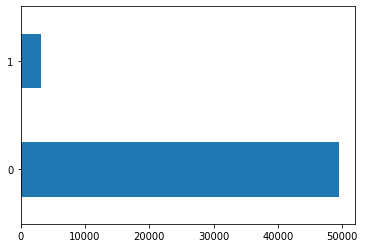

In [ ]:
def classFreqPlot(X):
  classFreq = X["OUTPUT_LABEL"].value_counts()
  print(classFreq)
  classFreq.plot.barh()
classFreqPlot(merged)

In [ ]:
def preprocess_text(df):
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT =df.TEXT.str.replace('\n',' ')
    df.TEXT =df.TEXT.str.replace('.',' ')
    df.TEXT =df.TEXT.str.replace('\r',' ')
    return df

In [ ]:
df_train = preprocess_text(df_train)
validation = preprocess_text(validation)
testing = preprocess_text(testing)

In [ ]:
df_train

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
0,18837,113797,EMERGENCY,2177-06-25 18:37:00,2177-06-29 13:48:00,NaN,NaT,NaN,NaN,Admission Date: [**2177-6-25**] Discharge...,0
1,27558,112191,EMERGENCY,2177-08-16 12:01:00,2177-08-16 12:00:00,2177-08-16 12:00:00,NaT,NaN,NaN,Admission Date: [**2177-8-16**] Dischar...,0
2,79372,102625,EMERGENCY,2197-12-27 06:35:00,2198-01-14 16:39:00,NaN,NaT,NaN,NaN,Admission Date: [**2197-12-27**] ...,0
3,75525,136062,EMERGENCY,2124-10-02 21:14:00,2124-10-05 17:25:00,NaN,NaT,NaN,NaN,Admission Date: [**2124-10-2**] ...,0
4,2573,155752,EMERGENCY,2174-08-24 02:42:00,2174-08-28 18:46:00,NaN,NaT,NaN,NaN,Admission Date: [**2174-8-24**] ...,0
...,...,...,...,...,...,...,...,...,...,...,...
5031,83520,136892,EMERGENCY,2181-07-28 14:48:00,2181-08-04 17:07:00,NaN,NaT,NaN,NaN,Admission Date: [**2181-7-28**] ...,0
5032,47887,146310,EMERGENCY,2143-09-02 22:41:00,2143-09-05 16:46:00,NaN,2143-09-30 15:04:00,EMERGENCY,24.929167,Admission Date: [**2143-9-2**] D...,1
5033,93838,102946,EMERGENCY,2106-09-26 17:51:00,2106-09-30 16:04:00,NaN,2108-04-17 11:44:00,EMERGENCY,564.819444,Admission Date: [**2106-9-26**] ...,0
5034,87651,101556,ELECTIVE,2129-04-12 08:15:00,2129-04-12 13:15:00,NaN,NaT,NaN,NaN,,0


In [ ]:
validation

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
9061,88526,108529,EMERGENCY,2188-07-25 01:46:00,2188-07-31 14:45:00,NaN,NaT,NaN,NaN,"Name: [**Known lastname **],[**Known firstnam...",0
4144,3708,133058,ELECTIVE,2181-11-21 11:15:00,2181-11-26 14:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2181-11-21**] Discha...,0
26434,16644,183141,ELECTIVE,2183-11-24 07:15:00,2183-12-01 13:20:00,NaN,NaT,NaN,NaN,Admission Date: [**2183-11-24**] ...,0
3222,3320,185608,EMERGENCY,2170-01-13 23:07:00,2170-01-14 12:00:00,2170-01-14 12:00:00,NaT,NaN,NaN,Admission Date: [**2170-1-13**] ...,0
2982,4074,137421,EMERGENCY,2204-02-04 07:26:00,2204-02-06 01:40:00,2204-02-06 01:40:00,NaT,NaN,NaN,Admission Date: [**2204-2-4**] D...,0
...,...,...,...,...,...,...,...,...,...,...,...
1127,83326,148589,EMERGENCY,2171-01-04 17:44:00,2171-01-07 13:05:00,NaN,NaT,NaN,NaN,Admission Date: [**2171-1-4**] D...,0
45999,79557,174882,EMERGENCY,2173-12-08 18:14:00,2173-12-11 13:57:00,NaN,NaT,NaN,NaN,Admission Date: [**2173-12-8**] ...,0
28993,9481,180858,EMERGENCY,2157-03-17 11:21:00,2157-03-27 15:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2157-3-17**] ...,0
9555,3203,138236,EMERGENCY,2131-11-21 18:13:00,2131-11-29 14:10:00,NaN,NaT,NaN,NaN,Admission Date: [**2131-11-21**] ...,0


In [ ]:
def tokenizers(text):
    punctuations = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punctuations, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

In [ ]:
vector = CountVectorizer(tokenizer = tokenizers)

In [ ]:
nltk.download('punkt')
vector = CountVectorizer(max_features = 3000, tokenizer = tokenizers)
vector.fit(df_train.TEXT.values)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(max_features=3000,
                tokenizer=<function tokenizers at 0x7f029a5d35f0>)

In [ ]:
stopwords_given = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also','*','.', ':','[',']','-','mg', 'po', 'q.d.','\t','\r']

In [ ]:
vector = CountVectorizer(max_features = 3000, 
                       tokenizer = tokenizers, 
                       stop_words = stopwords_given)

vector.fit(df_train.TEXT.values)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'q'] not in stop_words.
  % sorted(inconsistent)


CountVectorizer(max_features=3000,
                stop_words=['the', 'and', 'to', 'of', 'was', 'with', 'a', 'on',
                            'in', 'for', 'name', 'is', 'patient', 's', 'he',
                            'at', 'as', 'or', 'one', 'she', 'his', 'her', 'am',
                            'were', 'you', 'pt', 'pm', 'by', 'be', 'had', ...],
                tokenizer=<function tokenizers at 0x7f029a5d35f0>)

In [ ]:
df_train.TEXT[0]

"Admission Date:  [**2177-6-25**]     Discharge Date:  [**2177-6-29**]  Date of Birth:   [**2103-3-24**]     Sex:  M  Service:  CCU  HISTORY OF PRESENT ILLNESS:  Mr  [**Known lastname 48587**] is a 74 year-old male with a significant cardiac history who presented for elective cardiac catheterization after having progressive anginal symptoms   He has experienced increasing dyspnea on exertion and left chest pressure at rest and exercise tolerance test with imaging in [**2176-12-15**] showed a fixed anterior and inferior defect   PAST MEDICAL HISTORY: 1   Coronary artery disease status post myocardial infarction in [**2159**] and [**2161**]  2   Tachybrady syndrome status post pacer placement  3   Diabetes mellitus  4   Status post cerebrovascular accident times two  5   Atrial fibrillation  6   Obstructive sleep apnea on CPAP  7   Peripheral vascular disease  8   Depression   ALLERGIES:  The patient has no known drug allergies   MEDICATIONS: 1   Aspirin 325 mg po q d  2   Lopressor 50 m

In [ ]:
X_train = vector.transform(df_train.TEXT.values)
X_valid = vector.transform(validation.TEXT.values)

In [ ]:
X_train

<5036x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 2227747 stored elements in Compressed Sparse Row format>

In [ ]:
dataframe_X = pd.DataFrame(X_train)
dataframe_X.sample(10)

,0
3035,"(0, 3)\t1\n (0, 9)\t3\n (0, 15)\t3\n (0, ..."
1223,"(0, 4)\t4\n (0, 5)\t1\n (0, 15)\t2\n (0, ..."
1564,"(0, 1)\t2\n (0, 3)\t1\n (0, 4)\t1\n (0, 1..."
1218,"(0, 39)\t1\n (0, 54)\t1\n (0, 243)\t2\n (..."
1672,"(0, 2)\t2\n (0, 3)\t1\n (0, 4)\t1\n (0, 5..."
4047,"(0, 3)\t2\n (0, 4)\t2\n (0, 11)\t2\n (0, ..."
2656,
1734,"(0, 3)\t2\n (0, 4)\t3\n (0, 5)\t4\n (0, 1..."
187,"(0, 39)\t1\n (0, 54)\t1\n (0, 69)\t1\n (0..."
4696,"(0, 4)\t1\n (0, 14)\t1\n (0, 45)\t1\n (0,..."


In [ ]:
y_train = df_train.OUTPUT_LABEL
y_valid = validation.OUTPUT_LABEL

In [ ]:
clf=LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)  
clf.fit(X_train, y_train)

LogisticRegression(C=0.0001, random_state=42)

In [ ]:
y_train_prediction = clf.predict_proba(X_train)[:,1]
y_val_prediction = clf.predict_proba(X_valid)[:,1]

In [ ]:
print(y_train[:10].values)
print(y_train_prediction[:10])

[0 0 0 0 0 0 1 0 0 1]
[0.4805084  0.3536602  0.34673103 0.43830886 0.45115406 0.4429938
 0.73175139 0.44947476 0.54161533 0.69466981]


In [ ]:
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print("cv scores",scores)
print("cv scores",scores.mean())


cv scores [0.64285714 0.6285998  0.65839126 0.66434955 0.61966236]
cv scores 0.6427720244006243


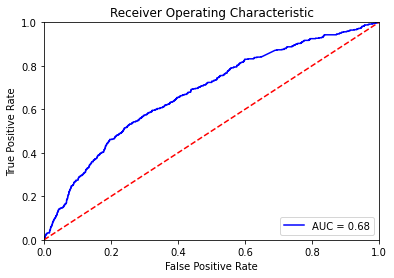

In [ ]:
probs = clf.predict_proba(X_valid)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_valid, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
def performance_report(predictions, actual):
  tn, fp, fn, tp = confusion_matrix(actual,predictions).ravel()
  sensitivity = tp/(tp+fn)
  speficity = tn/(tn+fp)
  print(f"Accuracy: {accuracy_score(actual,predictions)}")
  print(f"Precision: {precision_score(actual,predictions,average='weighted')}")
  print(f"Recall: {recall_score(actual,predictions,average='weighted')}")
  print(f"F1 score: {f1_score(actual,predictions,average='weighted')}")
  print(f"Sensitivity: {sensitivity}")
  print(f"Specificity: {speficity}")
  print(f"AUC: {roc_auc_score(actual,predictions)}")
  print(f"MCC: {matthews_corrcoef(actual,predictions)}")

In [ ]:
predictions = cross_val_predict(clf, X_valid, y_valid, cv=5)
performance_report(predictions, y_valid)

Accuracy: 0.938004402054292
Precision: 0.8798522582732299
Recall: 0.938004402054292
F1 score: 0.9079982040707268
Sensitivity: 0.0
Specificity: 1.0
AUC: 0.5
MCC: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf_RF = RandomForestClassifier(n_estimators=120,criterion='gini',max_features=0.5, max_depth=10)
clf_RF.fit(X_train, y_train)
y_train_prediction = clf_RF.predict_proba(X_train)[:,1]
y_val_prediction = clf_RF.predict_proba(X_valid)[:,1]


In [ ]:
print(y_train[:10].values)
print(y_train_prediction[:10])

[0 0 0 0 0 0 1 0 0 1]
[0.43297197 0.35320617 0.23058633 0.32844368 0.39074613 0.4507111
 0.82066195 0.37468014 0.14114137 0.80949161]


In [ ]:
scores = cross_val_score(clf_RF, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print("cv scores",scores)
print("cv scores",scores.mean())

cv scores [0.6577381  0.61966236 0.67428004 0.64945382 0.64349553]
cv scores 0.6489259705868444


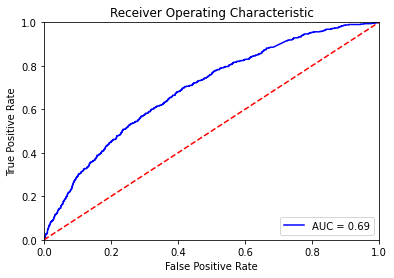

In [ ]:
probs = clf_RF.predict_proba(X_valid)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_valid, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
clf_XGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf_XGB.fit(X_train, y_train)
y_train_prediction = clf_XGB.predict_proba(X_train)[:,1]
y_val_prediction = clf_XGB.predict_proba(X_valid)[:,1]

In [ ]:
print(y_train[:10].values)
print(y_train_prediction[:10])

[0 0 0 0 0 0 1 0 0 1]
[0.40206856 0.37725428 0.17905017 0.27548107 0.12967964 0.51193015
 0.98197747 0.3918224  0.01900014 0.88149007]


In [ ]:
scores = cross_val_score(clf_XGB, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print("cv scores",scores)
print("cv scores",scores.mean())

cv scores [0.63492063 0.59880834 0.64051639 0.6266137  0.60675273]
cv scores 0.6215223593575133


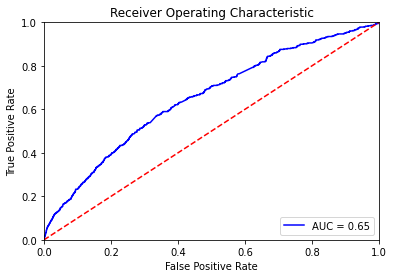

In [ ]:
probs = clf_XGB.predict_proba(X_valid)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_valid, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
clf_KNN = KNeighborsClassifier(n_neighbors=2)
clf_KNN.fit(X_train, y_train)
y_train_prediction = clf_KNN.predict_proba(X_train)[:,1]
y_val_prediction = clf_KNN.predict_proba(X_valid)[:,1]

In [ ]:
print(y_train[:10].values)
print(y_train_prediction[:10])

[0 0 0 0 0 0 1 0 0 1]
[0.  0.  0.  0.  0.  0.  0.5 0.  0.  1. ]


In [ ]:
scores = cross_val_score(clf_KNN, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print("cv scores",scores)
print("cv scores",scores.mean())

cv scores [0.56547619 0.55114201 0.54518371 0.5531281  0.56703078]
cv scores 0.5563921596443939


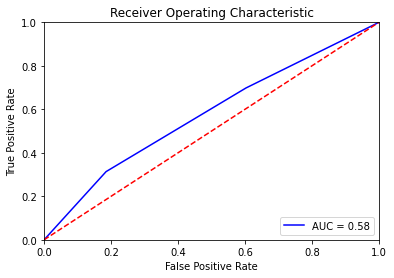

In [ ]:
probs = clf_KNN.predict_proba(X_valid)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_valid, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

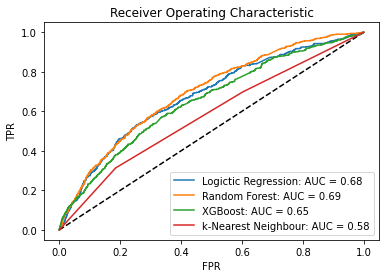

In [ ]:
#ROC Curve Combined
y_pred_prob1 = clf.predict_proba(X_valid)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_valid, y_pred_prob1)

y_pred_prob2 = clf_RF.predict_proba(X_valid)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_valid, y_pred_prob2)


y_pred_prob3 = clf_XGB.predict_proba(X_valid)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_valid, y_pred_prob3)

y_pred_prob4 = clf_KNN.predict_proba(X_valid)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_valid, y_pred_prob4)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logictic Regression: AUC = 0.68")
plt.plot(fpr2, tpr2, label= "Random Forest: AUC = 0.69")
plt.plot(fpr3, tpr3, label= "XGBoost: AUC = 0.65")
plt.plot(fpr4, tpr4, label= "k-Nearest Neighbour: AUC = 0.58")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

________________________________________________________________________________

In [ ]:
arr=np.asarray(df)
arr[0][8]


In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import string

from nltk import word_tokenize
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens


In [ ]:
y=df.OUTPUT_LABEL

In [ ]:
y

In [ ]:
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name','is','patient','s','he','at','as','or','one','she','his','her','am','were','you','pt','pm','by','be','had','your','this','date', 'from','there','an','that','p','are','have','has','h','but','o','namepattern','which','every','also']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, 
                       tokenizer = tokenizer_better, 
                       stop_words = my_stop_words)

vect.fit(df.TEXT.values)

In [ ]:
X=vect.transform(df.TEXT.values)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
clf.fit(X,y)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
y=y.values

In [ ]:
y_pred

In [ ]:
fpr, tpr, thresholds = roc_curve(y,y_pred)
roc_auc =auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred=clf.predict_proba(X)[:,1]

In [ ]:
y_pred

In [ ]:
counts = pd.DataFrame(matrix.toarray(),
                  columns=vect.get_feature_names())

counts


In [ ]:
my_sum_serie=counts.sum() #get a ordered pandas Series
my_sum_serie
d=my_sum_serie.to_dict()


In [ ]:

sorted(A, key=A.get, reverse=True)[:5]

In [ ]:
type(D)

In [ ]:
merged.head()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(30, 10), dpi=80)
D=sorted(d, key=d.get, reverse=True)[:20]
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.bar(D, [d[i] for i in D],width=1.0, facecolor='black', edgecolor='white')


In [ ]:
adTyp=merged.groupby(['ADMISSION_TYPE']).size()
col=merged.ADMISSION_TYPE.unique()
col=col.tolist()
col
adTyp=adTyp.tolist()
plt.bar(col,adTyp)

In [ ]:
adTyp=merged.groupby(['ADMISSION_TYPE_succeeding']).size()
col=merged.ADMISSION_TYPE.unique()
col=col.tolist()
col
adTyp=adTyp.tolist()
plt.bar(col,adTyp)

In [ ]:
import math

In [ ]:
daysgap=[]
daysgap.append((merged.As_D_time< 30).astype('int').sum())
daysgap.append((merged.As_D_time< 90).astype('int').sum())
daysgap.append((merged.As_D_time< 180).astype('int').sum())
daysgap.append((merged.As_D_time< 365).astype('int').sum())
daysgap.append((merged.As_D_time<math.inf).astype('int').sum())

In [ ]:
daysgap

In [ ]:
plt.bar(["30","90","180","365","any time"],daysgap,color="c")
plt.xlabel("readmission time")
plt.ylabel("number of patients")

 #< 30
 #> 30  <90
 #> 90 ++++++

In [ ]:
notes.CATEGORY.count()

In [ ]:

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.tight_layout()
ax = sns.countplot(x="CATEGORY", data=notes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")